FloatText(value=2000.0, description='Масса (кг):')

FloatText(value=0.9, description='Коэффициент трения:')

FloatText(value=0.9, description='Коэффициент жесткости:')

FloatText(value=2.2, description='Давление (бар):')

FloatText(value=70.0, description='Начальная скорость (Км/ч):')

Button(description='Обработать', style=ButtonStyle())

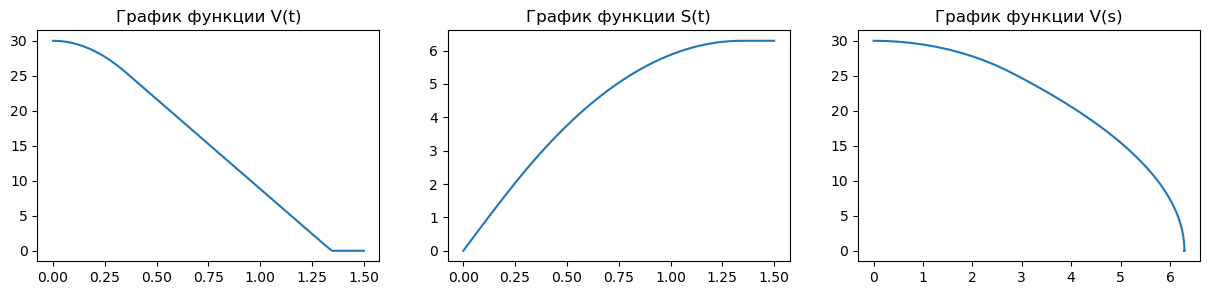

Тормозной путь: 6.293194127690483 м


In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import ipywidgets as widgets

def A(x):
    """
    Задаем функцию для ускорения
    """
    a = -0.08
    value = input_value()
    for i in value[1:-1]:
        a *= i
    a /= value[0] 
    if x > 0.35:
        return a
    if x < 0.35:
        return a / 0.35 * x


def V(x):
    '''
    Задаем функцию для скорости
    '''
    v0 = input_value()[-1]
    v = spi.quad(A, 0, x)[0] + v0 / 3.6
    if v > 0:
        return v
    else:
        return 0
    

def S(x):
    """
    Задаем функцию для пути
    """
    return spi.quad(V, 0, x)[0]


def on_button_click(button):
    """
    Создаем функцию для обработки нажатия на кнопку
    """

    # Задаем параметры для графиков
    t = np.linspace(0, input_value()[-1] / 20, 50)
    v = [V(i)*3.6 for i in t]
    s = [S(i) for i in t]


    # Создаем фигуру с тремя областями для графиков
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))

    # Строим первый график
    ax1.plot(t, v)
    ax1.set_title('График функции V(t)')

    # Строим второй график
    ax2.plot(t, s)
    ax2.set_title('График функции S(t)')

    # Строим третий график
    ax3.plot(s, v)
    ax3.set_title('График функции V(s)')

    plt.show()
    print(f"Тормозной путь: {s[-1]} м")

   
def input_value():
    """
    Получаем данные из полей для ввода
    """
    mass = float(mass_input.value)
    friction = float(friction_input.value)
    stiffness = float(stiffness_input.value)
    pressure = 100000 * float(pressure_input.value)
    speed_start = float(speed_start_input.value)
    return [mass, friction, stiffness, pressure, speed_start]

# Создаем поля для ввода данных
mass_input = widgets.FloatText(description='Масса (кг):', value=2000)
friction_input = widgets.FloatText(description='Коэффициент трения:', value=0.9)
stiffness_input = widgets.FloatText(description='Коэффициент жесткости:', value=0.9)
pressure_input = widgets.FloatText(description='Давление (бар):', value=2.2)
speed_start_input = widgets.FloatText(description='Начальная скорость (Км/ч):', value=70)

# Создаем кнопку
button = widgets.Button(description='Обработать')

# Назначаем обработчик нажатия на кнопку
button.on_click(on_button_click)

# Отображаем поля для ввода и кнопку

display(mass_input, friction_input, stiffness_input, pressure_input,speed_start_input, button)


